pip install mpld3

In [1]:
pip install mpld3

Note: you may need to restart the kernel to use updated packages.


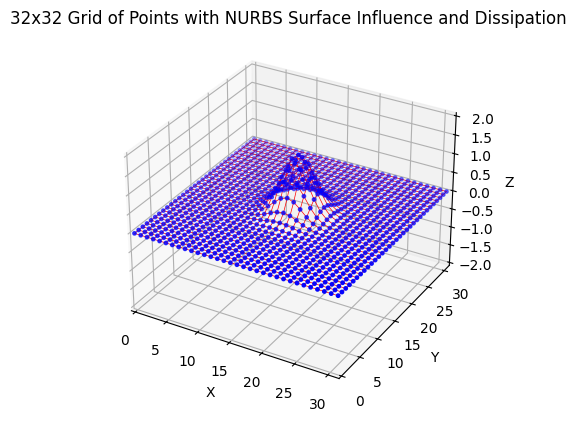

/usr/local/python/3.12.1/lib/python3.12/site-packages/mpld3/_display.py:246: SyntaxWarning: invalid escape sequence '\s'
  elif re.search('\s', figid):


TypeError: close() argument must be a Figure, an int, a string, or None, not <class 'matplotlib.animation.FuncAnimation'>

In [2]:
import mpld3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

mpld3.enable_notebook()
# Define grid size

grid_size = 32

# Create a grid of points
x = np.linspace(0, grid_size - 1, grid_size)  # X coordinates
y = np.linspace(0, grid_size - 1, grid_size)  # Y coordinates
X, Y = np.meshgrid(x, y)  # Create a meshgrid for X and Y
Z = np.zeros_like(X)  # Initialize Z coordinates

# Define a function to calculate Z based on NURBS-like smoothing
def nurbs_surface(X, Y, center_z):
    """Calculate Z based on a NURBS-like surface influenced by control points."""
    Z = np.zeros_like(X)
    center_x, center_y = grid_size // 2, grid_size // 2

    # Assign the high Z value to the center point
    Z[center_x, center_y] = center_z

    # Calculate Z values for surrounding points based on distance
    for i in range(grid_size):
        for j in range(grid_size):
            # Calculate the distance from the center point
            distance = np.sqrt((i - center_x) ** 2 + (j - center_y) ** 2)
            # Influence decreases with distance, using a Gaussian-like function
            Z[i, j] = center_z * np.exp(-0.1 * distance ** 2)

    return Z

# Define a j function to dissipate Z values
def j(Z, frame, decay_rate):
    """Apply linear decay to Z values based on the frame."""
    # Calculate decay factor based on the frame
    decay_factor = decay_rate * frame
    # Ensure Z values do not go below zero
    return np.clip(Z - decay_factor, -2, None)  # Adjust the lower limit as needed

# Set up the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initial Z coordinates
initial_center_z = 1.5
Z = nurbs_surface(X, Y, initial_center_z)

# Scatter plot of the grid points with reduced sphere size
spheres_size = 6  # Reduced size (originally 10)
scatter = ax.scatter(X, Y, Z, color='b', s=spheres_size)

# Connect the points with lines to form a grid
lines = []  # Store line objects for updating
for i in range(grid_size):
    line, = ax.plot(X[i, :], Y[i, :], Z[i, :], color='r', linewidth=0.5)  # Horizontal lines
    lines.append(line)

for j in range(grid_size):
    line, = ax.plot(X[:, j], Y[:, j], Z[:, j], color='r', linewidth=0.5)  # Vertical lines
    lines.append(line)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('32x32 Grid of Points with NURBS Surface Influence and Dissipation')

# Set limits for the axes
ax.set_xlim([0, grid_size - 1])
ax.set_ylim([0, grid_size - 1])
ax.set_zlim([-2, 2])  # Adjust Z limit to accommodate the moving sphere

# Frame control variables
frame = 0
direction = 1  # 1 for forward, -1 for backward
golden_ratio = (1 + np.sqrt(5)) / 2  # Golden ratio

# Animation function
def update(frame):
    global initial_center_z

    # Calculate new Z value for the center point
    if frame < 300:  # Oscillate downwards
        center_z = initial_center_z - (3.0 * (frame / 300))  # Start at 1.5 and go down to -1.5
    else:  # Oscillate upwards
        center_z = -1.5 + (3.0 * ((frame - 300) / 300))  # Move back to 1.5

    Z[:] = nurbs_surface(X, Y, center_z)  # Update Z coordinates based on the new center_z
   # print("Initial Z values at frame 0:", Z)  # Output the initial Z values
   # Z[:] = j(Z, frame, decay_rate=1)  # Apply the j function to dissipate Z values
    scatter._offsets3d = (X.flatten(), Y.flatten(), Z.flatten())  # Update scatter plot

    # Update line Z coordinates to match the scatter points
    for i in range(grid_size):
        lines[i].set_data(X[i, :], Y[i, :])
        lines[i].set_3d_properties(Z[i, :])  # Update Z for horizontal lines

    for j in range(grid_size):
        lines[grid_size + j].set_data(X[:, j], Y[:, j])
        lines[grid_size + j].set_3d_properties(Z[:, j])  # Update Z for vertical lines

    # Check for completion of a cycle
    if frame == 600:  # After two full cycles (600 frames)
        initial_center_z /= golden_ratio  # Reduce the amplitude by the golden ratio
        frame = 0  # Reset frame count for the next cycle

    return scatter, *lines

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 600), interval=100, blit=False)

plt.show() 

mpld3.display(ani)

#plt.show()  # Display the plot



